In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [2]:
#Ler dataset

df = pd.read_csv('Dataset_cleared.csv')

### Dataset

In [3]:
df

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,...,Volume,Subtlety,Internalstructure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy
0,0.219031,5.542891,25.306411,24.020824,39.051248,26.000000,41.509035,1874.625000,21.474857,0.546513,...,2516.304375,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,4.0
1,0.215045,5.209030,24.222923,30.016662,31.064449,23.021729,31.064449,1717.416667,20.477091,0.560402,...,2193.250312,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,4.0
2,0.289526,1.632763,5.639429,6.000000,6.324555,5.099020,6.324555,29.291667,4.958806,0.721639,...,62.107500,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.0
3,0.216692,6.435946,29.700850,37.054015,43.566042,35.227830,49.284886,3610.791667,28.419506,0.547252,...,4870.685625,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.0
4,0.595806,7.374952,12.378110,15.524175,14.142136,12.041595,15.588457,506.541667,9.653513,0.660676,...,585.183076,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,0.375133,4.534490,12.087678,12.806248,11.401754,13.928388,14.628739,313.083333,9.595771,0.664923,...,140.178680,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.0
2647,0.687954,8.589183,12.485120,14.422205,14.317821,12.649111,15.165751,605.541667,9.416961,0.697558,...,182.381630,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,4.0
2648,0.185778,2.586515,13.922612,11.045361,14.866069,12.165525,15.842980,177.541667,7.855304,0.597379,...,127.207670,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,4.0
2649,0.247844,2.471175,9.970706,7.280110,7.211103,7.615773,10.440307,70.041667,4.521458,0.708770,...,81.383582,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.0


### Treinar o SVM

In [4]:
X = df.loc[:, df.columns != 'Malignancy']
Y = df['Malignancy']

In [5]:
#Training set e Test set

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20)

In [6]:
#Fit classifier in Training set

#kernel (distrib nao linear): poly, rbf, sigmoid
#kernel (distrib linear): linear
#kernel (matriz de similaridade como input): precompute
#também se pode especificar um kernel personalizado fornecendo uma função chamável (callable) que implementa o cálculo do kernel desejado

#poly : passa os dados 1D para 2D quando temos distribuição nao linear, passando a ter distribuição linear em 2D
#default kernel = 'rbf'
#o melhor kernel para este caso é o kernel='rbf'

classifier = SVC(kernel = 'rbf')
SVM_fit = classifier.fit(X_Train, Y_Train)

In [7]:
# Predicting the test set results

SVM_pred = classifier.predict(X_Test)

/Users/mafaldaaires/anaconda3/envs/LIACD/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mafaldaaires/anaconda3/envs/LIACD/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mafaldaaires/anaconda3/envs/LIACD/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mafaldaaires/anaconda3/envs/LIACD/lib/python3.

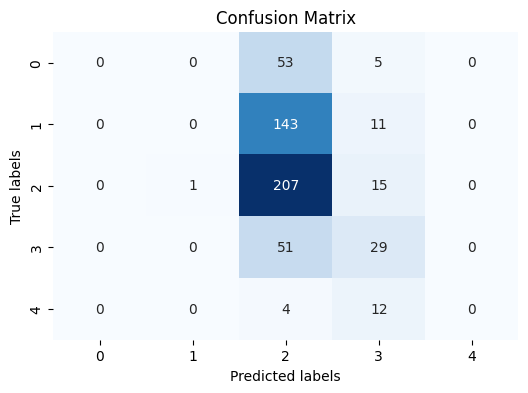

In [8]:
# Making the Confusion Matrix 

cm = confusion_matrix(Y_Test, SVM_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [9]:
print("Precisão do SVM: ", accuracy_score(Y_Test, SVM_pred))

Precisão do SVM:  0.4444444444444444


/Users/mafaldaaires/anaconda3/envs/LIACD/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mafaldaaires/anaconda3/envs/LIACD/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mafaldaaires/anaconda3/envs/LIACD/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

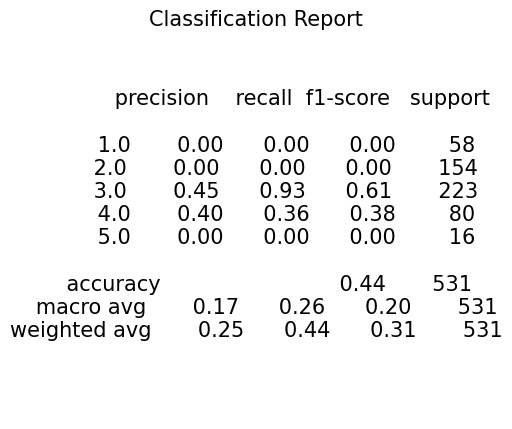

In [10]:
report = classification_report(Y_Test, SVM_pred)

fig, axs = plt.subplots(1, 1, figsize=(5,5))

axs.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=15)
axs.axis('off')
axs.set_title('Classification Report', fontsize=15)

# Display the figure
plt.show()